<a href="https://colab.research.google.com/github/Madhu-95/capstone_project3_ml_classification/blob/main/Cardiovascular_risk_prediction(classification_ML)_By_MADHU_KUMARI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : CARDIOVASCULAR DISEASE RISK PREDICTION </u></b>

## <b> Problem Description: </b>
### Cardiovascular disease is the leading cause of death worldwide and a major public health concern. Therefore, its risk assessment is crucial to many existing treatment guidelines. Risk estimates are also being used to predict the magnitude of future cardiovascular disease mortality and morbidity at the population level and in specific subgroups to inform policymakers and health authorities about these risks. Additionally, risk prediction inspires individuals to change their lifestyle and behaviour and to adhere to medications.

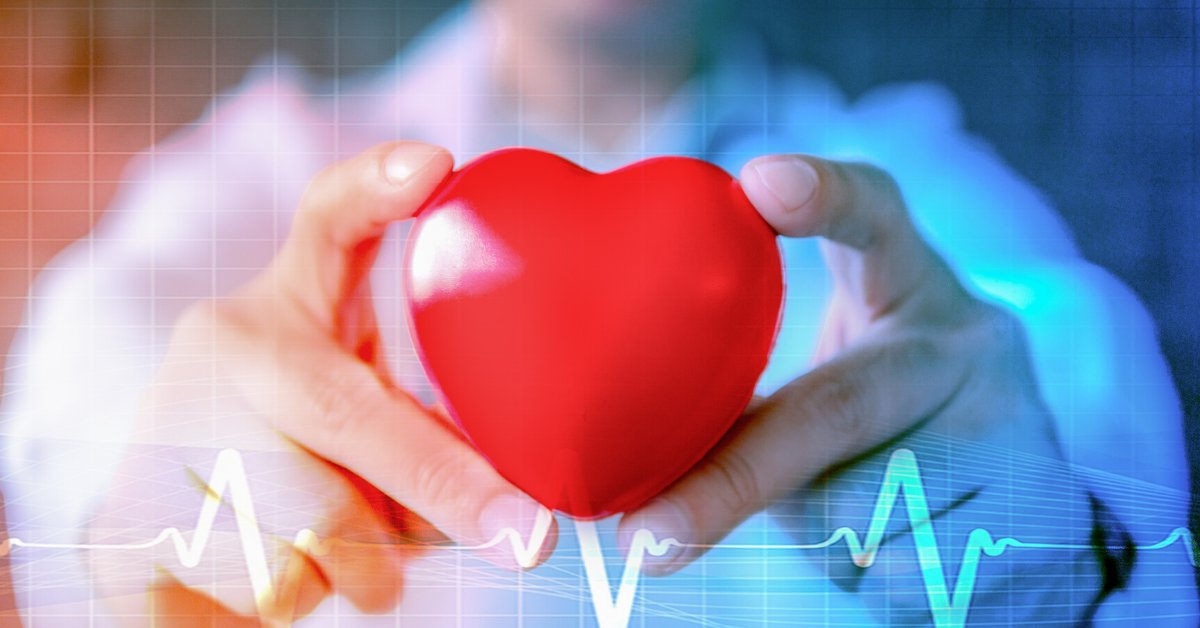

### **OVERVIEW:**

#### In this PROJECT, we will be closely working with the heart disease prediction and for that, we will be looking into the heart disease dataset from that dataset we will derive various insights that help us know the weightage of each feature and how they are interrelated to each other but this time our sole aim is to detect the probability of person that will be affected by a severe heart problem or not.





## <b> Data Description </b>

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information.** 

It includes
over 4,000 records and 15 attributes.


#### **Variables:**
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.


***Demographic:***

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)


***Behavioral:***

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)


***Medical (history):***

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)


***Predict variable (desired target):***

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

### ***STEPS INVOLVED:***
The Cardiovascular Disease prediction will have the following key takeaways:

***Data insight:*** As mentioned here we will be working with the cardiovascular disease detection dataset and we will be putting out interesting inferences from the data to derive some meaningful results.


***EDA:*** Exploratory data analysis is the key step for getting meaningful results.


***Feature engineering:*** After getting the insights from the data we have to alter the features so that they can move forward for the model building phase.


***Model building:*** In this phase, we will be building our Machine learning model for heart disease detection.

**So, let's get started!!!!**

# **LOAD DATASET & IMPORT LIBRARIES**

In [2]:
#Import libraries first (These are the modules from outside the standard library and are required.)
#Plotting libraries
import pandas as pd  #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf

#Metrics for Classification technique
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

# Model building
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')



##**MOUNT GOOGLE DRIVE**


In [3]:
#let's mount the google drive to import the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/'

In [5]:
#Let's import the dataset now(this contains the datset that we need to work on)
df = pd.read_csv(path + 'data_cardiovascular_risk.csv', encoding ='latin')


# **A further insight into the data**

## **Summary of the data**

In [6]:
df.head(10) #to show the first 10 rows for quickly testing if the object has the right type of data in it

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


## ***Exploratory Data Analysis(EDA):***
Now, let’s see the size of the dataset

In [7]:
print(df.shape) #prints the number of rows and columns in the dataset

(3390, 17)


***We can see that there are 3390 rows and 17 columns in our dataset.***

In [8]:
df.info()          #prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
df.isnull()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3388,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

####***We find that the columns:***

*   education
*   cigsPerDay
*   BPMeds
*   totChol
*   BMI
*   HeartRate, and 
*   glucose 

have null values..







In [10]:
print("Features of the dataset:")
df.columns #prints all the column titles in the dataset 

Features of the dataset:


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
df.nunique() #prints the number of unique values in each column

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64